# BOSTON Data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.datasets import get_rdataset
from scipy import stats

In [2]:
boston = get_rdataset("Boston", "MASS").data

In [3]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

## For the "Median value of owner-occupied homes" provide a boxplot 

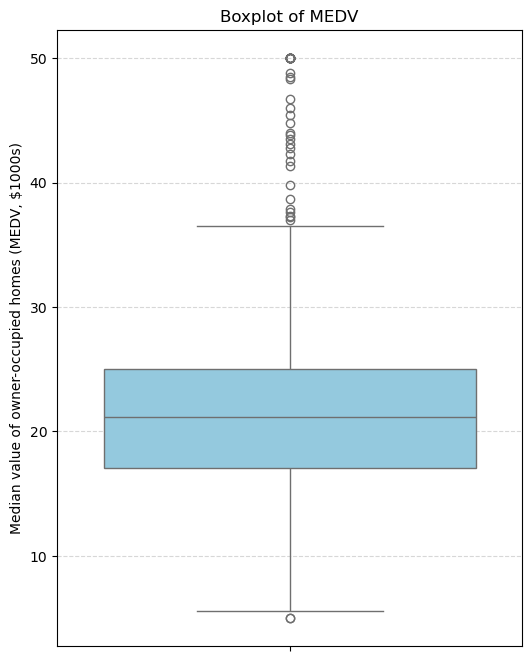

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
sns.boxplot(y=boston['medv'], color='skyblue')
plt.ylabel('Median value of owner-occupied homes (MEDV, $1000s)')
plt.title('Boxplot of MEDV')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Provide a  bar plot for the Charles river variable

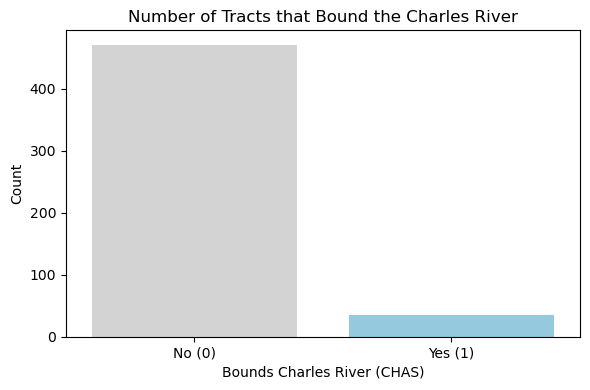

In [10]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='chas', data=boston, hue='chas', palette=['lightgray', 'skyblue'], legend=False)
ax.set_xlabel('Bounds Charles River (CHAS)')
ax.set_ylabel('Count')
ax.set_title('Number of Tracts that Bound the Charles River')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

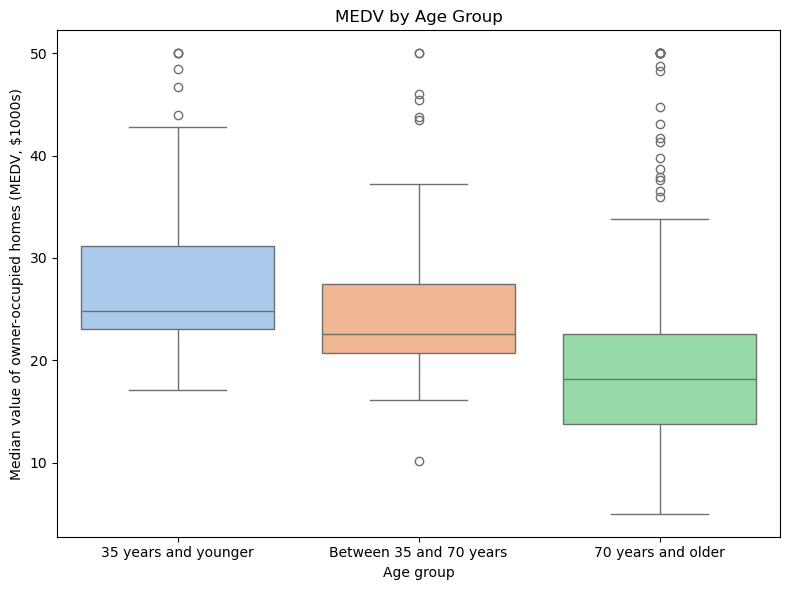

In [30]:
bins = [-np.inf, 35, 70, np.inf]  # ( -inf, 35], (35, 70], (70, inf ]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston['age_group'] = pd.cut(boston['age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(8,6))
sns.boxplot(x='age_group', y='medv', data=boston, hue='age_group', order=labels, palette='pastel', dodge=False, legend=False)
plt.xlabel('Age group')
plt.ylabel('Median value of owner-occupied homes (MEDV, $1000s)')
plt.title('MEDV by Age Group')
plt.tight_layout()
plt.show()

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

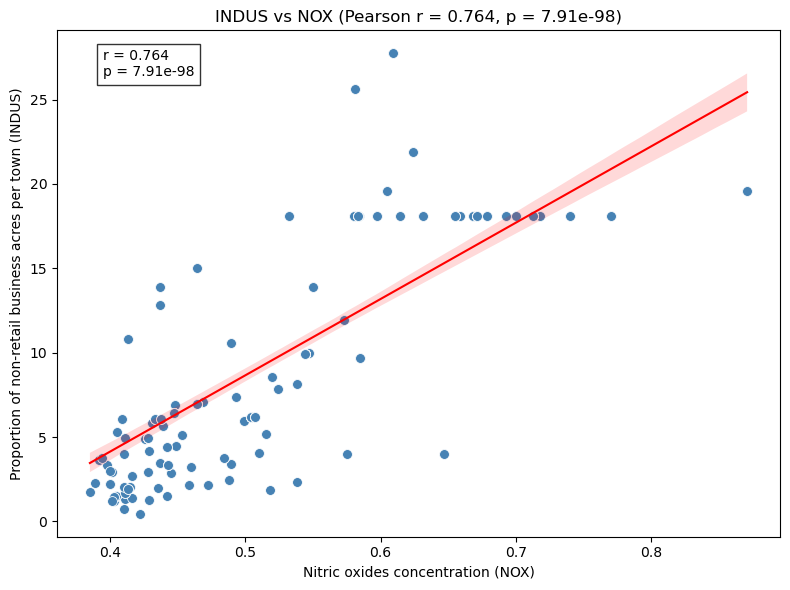

Interpretation: There is a strong positive association between NOX and INDUS (r = 0.764). Higher NOX concentrations tend to occur in towns with a larger proportion of non-retail business acres.


In [31]:
# Scatter plot of NOX vs INDUS with regression line and correlation
x = boston['nox']
y = boston['indus']

r, pval = stats.pearsonr(x, y)

plt.figure(figsize=(8,6))
sns.scatterplot(x='nox', y='indus', data=boston, s=50, color='steelblue', edgecolor='w')
sns.regplot(x='nox', y='indus', data=boston, scatter=False, color='red', line_kws={'linewidth':1.5})
plt.xlabel('Nitric oxides concentration (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.title(f'INDUS vs NOX (Pearson r = {r:.3f}, p = {pval:.2e})')

# Annotate a short interpretation on the plot
x_pos = x.min() + 0.02 * (x.max() - x.min())
y_pos = y.max() - 0.05 * (y.max() - y.min())
plt.text(x_pos, y_pos, f'r = {r:.3f}\np = {pval:.2e}', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


print(f"Interpretation: There is a strong positive association between NOX and INDUS (r = {r:.3f}). Higher NOX concentrations tend to occur in towns with a larger proportion of non-retail business acres.")

## Create a histogram for the pupil to teacher ratio variable

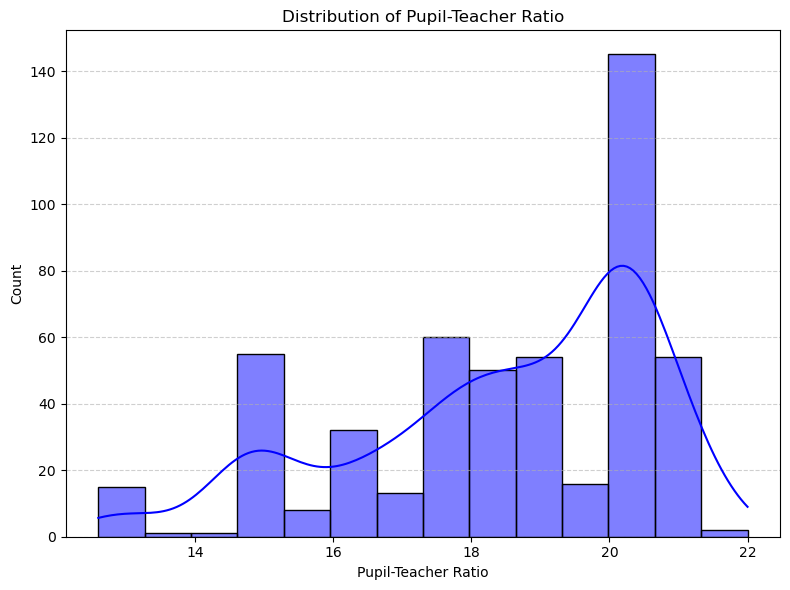

In [32]:
plt.figure(figsize=(8,6))
ax_hist = sns.histplot(boston['ptratio'], bins="auto", kde=True, color='blue', edgecolor='black')
ax_hist.set_xlabel('Pupil-Teacher Ratio')
ax_hist.set_ylabel('Count')
ax_hist.set_title('Distribution of Pupil-Teacher Ratio')
ax_hist.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Task 3: Use the appropriate tests to answer the questions provided.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Hypotheses:**  
- H0: There is no difference in median value (MEDV) between houses bounded by the Charles river and those not bounded.  
- H1: There is a difference in median value (MEDV) between the two groups.  

α = 0.05

In [33]:
t_stat, p_val = stats.ttest_ind(boston[boston['chas']==0]['medv'], boston[boston['chas']==1]['medv'], equal_var=False)
print(f"t={t_stat:.2f}, p={p_val:.4f}")

t=-3.11, p=0.0036


## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Hypotheses:**  
- H0: The mean MEDV is the same for all AGE groups.  
- H1: At least one AGE group has a different mean MEDV.  

α = 0.05

In [34]:
f_stat, p_val = stats.f_oneway(
    boston[boston['age_group']=='35 years and younger']['medv'],
    boston[boston['age_group']=='Between 35 and 70 years']['medv'],
    boston[boston['age_group']=='70 years and older']['medv']
)
print(f"F={f_stat:.2f}, p={p_val:.4f}")

F=36.41, p=0.0000


## Is there a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Hypotheses:**  
- H0: There is no correlation between NOX and INDUS.  
- H1: There is a correlation between NOX and INDUS.  

α = 0.05

In [35]:
r, p_val = stats.pearsonr(boston['nox'], boston['indus'])
print(f"r={r:.2f}, p={p_val:.4f}")

r=0.76, p=0.0000


## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Hypotheses:**  
- H0: The slope between DIS (distance) and MEDV is zero (no relationship).  
- H1: The slope is not zero (there is a relationship).  

α = 0.05

In [36]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(boston['dis'], boston['medv'])
print(f"slope={slope:.2f}, p={p_value:.4f}")

slope=1.09, p=0.0000
